In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('movies_stats.csv')

In [2]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [3]:
years = [x for x in range(1950, 2011)]

In [52]:
def production_year():
    pattern = r'\((\d{4})\)' 
    year = df['title'].str.extract(pattern, expand=False)
    year = year.fillna(1900)
    year = year.astype(int)
    
    df['year'] = np.where((year.isin(years)),year ,'1900')
    return df

production_year()

,userId,movieId,rating,timestamp,title,genres,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,1995
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,1900
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,1996
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,1981
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,1989
...,...,...,...,...,...,...,...
99999,671,6268,2.5,1065579370,Raising Victor Vargas (2002),Comedy|Drama|Romance,2002
100000,671,6269,4.0,1065149201,Stevie (2002),Documentary,2002
100001,671,6365,4.0,1070940363,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX,2003
100002,671,6385,2.5,1070979663,Whale Rider (2002),Drama,2002


In [39]:
df['year'] = df['year']

df_ratings = df[['year', 'rating']]

df_ratings = df_ratings.groupby(['year']).mean().sort_values(by='rating', ascending=False).reset_index()
df_ratings.head()

,year,rating
0,1957,4.014241
1,1972,4.011136
2,1952,4.000000
3,1954,3.994220
4,1951,3.983539


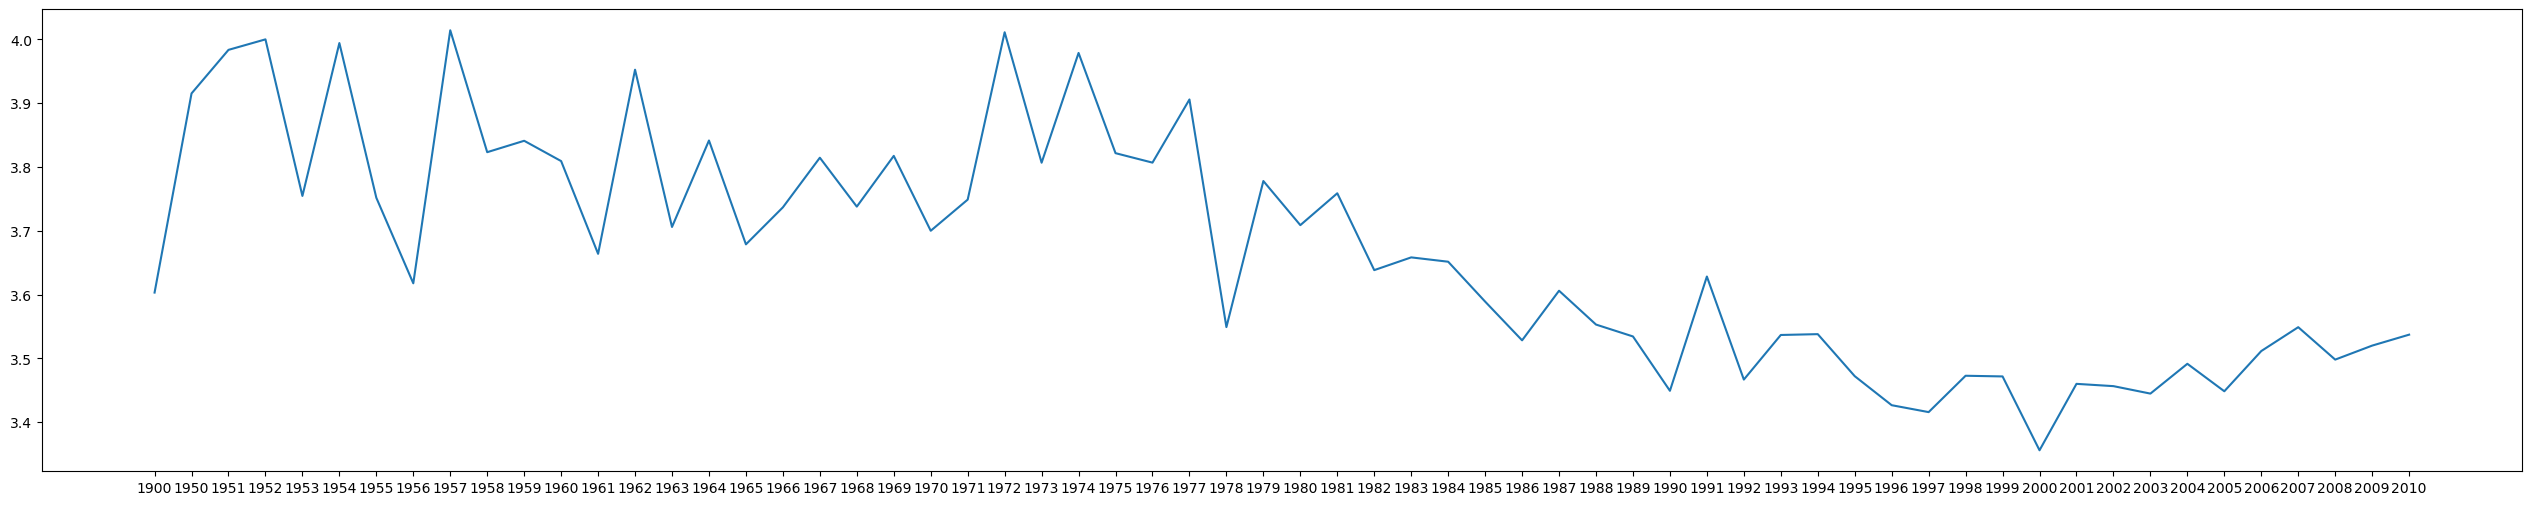

In [48]:
import matplotlib.pyplot as plt

df_ratings = df_ratings.sort_values(by='year', ascending=True)

x = df_ratings['year']
y = df_ratings['rating']

plt.figure(figsize=(32, 6))
plt.plot(x, y)